# Assignment 12 - Neural Networks image recognition
Use both MLNN and the ConvNet to solve the following problem.

1. Add random noise (i.e. `np.random.normal`) to the images in training and testing. Make sure each image gets a different noise feature added to it. Inspect by printing out an image. 
2. Compare the loss/accuracy (train, val) after N epochs for both MLNN and ConvNet with and without noise. 
3. Vary the amount of noise (multiply `np.random.normal` by a factor) and keep track of the accuracy and loss (for training and validation) and plot these results.

## Note on assignment:  
Because of time constraints, I was not able to complete the 3rd prompt with more varied amounts of noise or run models to find ideal parameters. The processing for both the MLNN and CNNs on my laptop were very time intensive.  I was also running into multiple error codes which I had trouble remedying directly (and thus had to create multiple jupyter notebooks with different kernels).

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop, Nadam, Adadelta
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline

Using TensorFlow backend.


# Summary of Results for Parts 1-3
Compare the loss/accuracy (train, val) after N epochs for both MLNN and ConvNet with and without noise. 

The table below shows the results of the various models.  You can see that generally the Convolutional Neural Networks performed better than the Multi-layer Neural Networks even against noisy data.

### Accuracy Scores

**Model Type**&nbsp;   || *No Noise* || *With Noise* || *With Amplified Noise* ||

**MLNN**&emsp;&emsp;&emsp;   || &nbsp;     98.5%&nbsp;    &nbsp;      ||   &nbsp;    81.2% &nbsp; &nbsp;         || &nbsp;       80.2%              ||

**CNN**&emsp;&emsp;&emsp;&ensp;&nbsp;   ||  &nbsp;    99.2% &nbsp; &nbsp;        ||  &nbsp;     97.5% &nbsp; &nbsp;         || &nbsp;       97.4%              ||



### Loss Scores

**Model Type**&nbsp;   || *No Noise* || *With Noise* || *With Amplified Noise* ||

**MLNN**&emsp;&emsp;&emsp;   || &nbsp; &nbsp;    0.11&nbsp;    &nbsp;&nbsp;      ||   &nbsp;  &nbsp;  0.92 &nbsp;&nbsp; &nbsp; &nbsp;        || &nbsp;  &nbsp;&nbsp;     0.82  &nbsp;&nbsp;            ||

**CNN**&emsp;&emsp;&emsp;&ensp;&nbsp;  || &nbsp; &nbsp;    0.03&nbsp;    &nbsp;  &nbsp;    ||   &nbsp;  &nbsp;  0.09 &nbsp;&nbsp; &nbsp; &nbsp;         || &nbsp;  &nbsp;&nbsp;     0.08  &nbsp;&nbsp;            ||


# Part 2: With noise (np.random.normal)
1. Add random noise (i.e. `np.random.normal`) to the images in training and testing. Make sure each image gets a different noise feature added to it. Inspect by printing out an image. 

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Previous model gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#add in the noise by multiplying by np.random.normal

x2_train = x_train * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x2_test = x_test * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [5]:
x2_train = x2_train.reshape(60000, 784)
x2_test = x2_test.reshape(10000, 784)

x2_train = x2_train.astype('float32')
x2_test = x2_test.astype('float32')
x2_train /= 255
x2_test /= 255
print(x2_train.shape, 'train samples')
print(x2_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


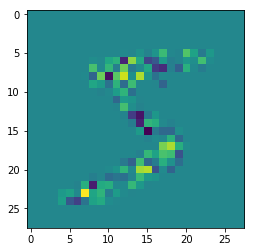

In [6]:
#check out an image from training set
plt.imshow(x2_train[0].reshape(28,28)) #need to add in .reshape to the shape of the matrix to plot
plt.show()

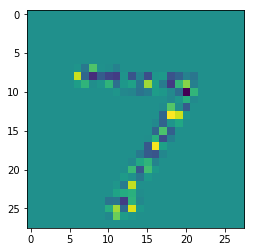

In [7]:
#check out an image from test set
plt.imshow(x2_test[0].reshape(28,28)) #need to add in .reshape to the shape of the matrix to plot
plt.show()

**Observation:** The images above show a very pixelated/grainy/noisy image.  

In [8]:
batch_size = 128
num_classes = 10
epochs = 30


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x2_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x2_test, y_test))
score = model.evaluate(x2_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total para

**Observation:** As expected, the accuracy decreased dramatically when noise was introduced.  The accuracy for this model without noise was 98.5%, for the model with noisy data the accuracy dropped to 81.2%.

## Conv Net
Trains a simple convnet on the MNIST dataset.
Previous model got to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# insert random noise
x2c_train = x_train * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x2c_test = x_test * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

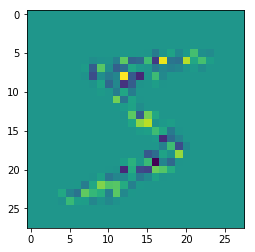

In [3]:
#check out an image from training set
plt.imshow(x2c_train[0].reshape(28,28)) #need to add in .reshape to the shape of the matrix to plot
plt.show()

In [4]:
if backend.image_data_format() == 'channels_first':
    x2c_train = x2c_train.reshape(x2c_train.shape[0], 1, img_rows, img_cols)
    x2c_test = x2c_test.reshape(x2c_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x2c_train = x2c_train.reshape(x2c_train.shape[0], img_rows, img_cols, 1)
    x2c_test = x2c_test.reshape(x2c_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x2c_train = x2c_train.astype('float32')
x2c_test = x2c_test.astype('float32')
x2c_train /= 255
x2c_test /= 255
print('x2c_train shape:', x2c_train.shape)
print(x2c_train.shape[0], 'train samples')
print(x2c_test.shape[0], 'test samples')

x2c_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
#changed parameters for model, changed optimizer, decreased batch size, decrease epochs, decrease neurons (to speed up processing)

batch_size = 64
num_classes = 10
epochs = 8

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Nadam(),
              metrics=['accuracy'])

model2.fit(x2c_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x2c_test, y_test))
score = model2.evaluate(x2c_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 236s - loss: 0.6568 - acc: 0.7860 - val_loss: 0.1795 - val_acc: 0.94596580 - acc: 0.
Epoch 2/8
60000/60000 [==============================] - 260s - loss: 0.3330 - acc: 0.8971 - val_loss: 0.1225 - val_acc: 0.9619
Epoch 3/8
60000/60000 [==============================] - 232s - loss: 0.2675 - acc: 0.9168 - val_loss: 0.1081 - val_acc: 0.9656
Epoch 4/8
60000/60000 [==============================] - 232s - loss: 0.2352 - acc: 0.9286 - val_loss: 0.0974 - val_acc: 0.9697
Epoch 5/8
60000/60000 [==============================] - 234s - loss: 0.2114 - acc: 0.9358 - val_loss: 0.0907 - val_acc: 0.9728
Epoch 6/8
60000/60000 [==============================] - 237s - loss: 0.1956 - acc: 0.9389 - val_loss: 0.0919 - val_acc: 0.9704
Epoch 7/8
60000/60000 [==============================] - 278s - loss: 0.1819 - acc: 0.9434 - val_loss: 0.0855 - val_acc: 0.9740
Epoch 8/8
60000/60000 [=================

**Observation:** Even though this CNN model performed worse than the model without noisy data (which had an accuracy score of 99.2%), with an accuracy of 97.5% it performed far better than our results for the multi-layer neural network.  This is likely because CNNs also flatten the images and the use of a drop out provides flexiblity on the network and finds the core elements which makes those numbers.

# Part 3: Amplified Noise Data
Vary the amount of noise (multiply `np.random.normal` by a factor) and keep track of the accuracy and loss (for training and validation) and plot these results.

## Multi Layer Neural Network with Amplified Noise Data

In [20]:
#add in the noise by multiplying by np.random.normal


x3_train = (x_train * (10*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)))
x3_test = (x_test * (10*np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)))

In [21]:
x3_train = x3_train.reshape(60000, 784)
x3_test = x3_test.reshape(10000, 784)

x3_train = x3_train.astype('float32')
x3_test = x3_test.astype('float32')
x3_train /= 255
x3_test /= 255
print(x3_train.shape, 'train samples')
print(x3_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


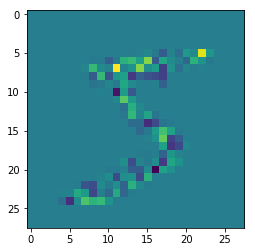

In [22]:
#check out an image from training set
plt.imshow(x3_train[0].reshape(28,28)) #need to add in .reshape to the shape of the matrix to plot
plt.show()

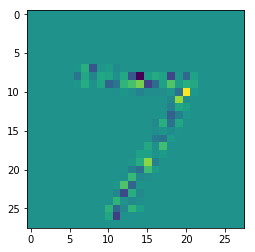

In [23]:
#check out an image from test set
plt.imshow(x3_test[0].reshape(28,28)) #need to add in .reshape to the shape of the matrix to plot
plt.show()

**Observation:** The images are even more pixelated and there's less yellow spots than before.

In [24]:
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(784,)))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='sigmoid'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

model2.summary()

model2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model2.fit(x3_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x3_test, y_test))
score = model2.evaluate(x3_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total para

**Observation:** With the adding in of a factor added to the random noise (amplifying the noise), the accuracy score decreased yet again from initally 98.5% (no noise), to 81.2% (random noise), to 80.2% (varied random noise). 

## Conv Net with Varied Noise Data

In [6]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


#add in the noise by multiplying by np.random.normal
x3c_train = (x_train * (10*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)))
x3c_test = (x_test * (10*np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)))

if backend.image_data_format() == 'channels_first':
    x3c_train = x3c_train.reshape(x3c_train.shape[0], 1, img_rows, img_cols)
    x3c_test = x3c_test.reshape(x3c_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x3c_train = x3c_train.reshape(x3c_train.shape[0], img_rows, img_cols, 1)
    x3c_test = x3c_test.reshape(x3c_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x3c_train = x3c_train.astype('float32')
x3c_test = x3c_test.astype('float32')
x3c_train /= 255
x3c_test /= 255
print('x3c_train shape:', x3c_train.shape)
print(x3c_train.shape[0], 'train samples')
print(x3c_test.shape[0], 'test samples')

x3c_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
batch_size = 64
num_classes = 10
epochs = 8

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model3 = Sequential()
model3.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Nadam(),
              metrics=['accuracy'])

model3.fit(x3c_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x3c_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 238s - loss: 0.6931 - acc: 0.7738 - val_loss: 0.1658 - val_acc: 0.9539
Epoch 2/8
60000/60000 [==============================] - 258s - loss: 0.3318 - acc: 0.8986 - val_loss: 0.1376 - val_acc: 0.9566
Epoch 3/8
60000/60000 [==============================] - 234s - loss: 0.2642 - acc: 0.9197 - val_loss: 0.1153 - val_acc: 0.9633
Epoch 4/8
60000/60000 [==============================] - 214s - loss: 0.2300 - acc: 0.9308 - val_loss: 0.1011 - val_acc: 0.9696
Epoch 5/8
60000/60000 [==============================] - 222s - loss: 0.2031 - acc: 0.9386 - val_loss: 0.0977 - val_acc: 0.9697
Epoch 6/8
60000/60000 [==============================] - 210s - loss: 0.1863 - acc: 0.9427 - val_loss: 0.0838 - val_acc: 0.9734
Epoch 7/8
60000/60000 [==============================] - 211s - loss: 0.1692 - acc: 0.9481 - val_loss: 0.0852 - val_acc: 0.9739
Epoch 8/8
60000/60000 [==============================]

In [8]:
score = model3.evaluate(x3c_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0795782163342
Test accuracy: 0.9744


**Observation:** With the noisier data, the accuracy score decreased by 0.03 from 97.47% to 97.44%, only a slight difference. The loss score decreased though.